In [1]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

from citipy import citipy

# Import the random module.
import random

In [2]:
# Import timeit.
import timeit

In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-7.402453789514894 -18.764360682038784
74.42423353570291 -81.54290471721833
-26.484800714259976 -23.089709900715917
48.99128472983975 17.775123855964637
-23.398645802452563 88.20803366962559
-3.1123895183510797 -140.73012990600364
-75.26704422179887 -83.31199358221289
62.6844188069783 0.7377404498757301
32.22990112076545 -30.93131594138009
4.612810976805065 -14.359258819803188
-11.008826999944674 -48.888425309118105
-11.352815404136265 -67.55634157800597
6.219820696534271 87.74256622860287
16.776556447978322 -19.979753135335045
31.414605684671443 73.89616337043427
-34.58558000695336 32.25342887027361
16.02989388672448 146.62752383501726
-43.227728841291935 -120.76779067608564
66.67246222959832 -142.26055014983777
-82.61129393782467 -8.38971020022828
45.642747357017214 -164.58208728013128
-85.03808906935473 -120.83153030673283
66.10531614525945 71.25817261147719
84.64220413073264 -164.24997576880628
77.90308506809475 -145.2914618761968
-24.74980947707506 -122.17049139467619
52.879530239

27.306497844677992 -151.27319497862874
25.50095087174789 -31.84517506835789
29.887582105909402 -113.14076306077101
37.09151031319033 -68.77604927685772
-87.45448134046681 -104.01836030719231
7.809994507106424 106.33411424505397
-56.247580032598975 -111.2275199370153
-82.91177866855016 99.7704445561759
54.143478507878854 -57.156499549524085
-77.55385936340457 71.74834652319188
-55.113111406920716 137.49310209867383
62.242352215989115 -6.581391650014979
-72.9427253157373 -17.09077135287626
-56.55488920594051 131.15967641209437
-12.723545489681982 57.399477309962606
69.64869968063067 -125.64398848383895
44.577272031067 87.34707034568606
-35.433633349297004 -86.08043892051766
54.36957422045606 -13.469582921239663
-4.221941512282285 -82.0948466744872
-60.029108644985364 -119.44043944738962
-67.06365418976802 -52.843080947743815
37.38376828992456 22.835811335230005
66.4746286132428 94.25631129390075
35.976655053907095 74.05553982620404
36.83510467702364 49.63515202993602
72.82026848346106 -3

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=344a130c3da6b45f1af629757b465755


In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=344a130c3da6b45f1af629757b465755&q=Boston


In [11]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"base":"stations","main":{"temp":55.98,"feels_like":55.6,"temp_min":53.2,"temp_max":58.64,"pressure":1002,"humidity":92},"visibility":10000,"wind":{"speed":5.99,"deg":313,"gust":11.99},"clouds":{"all":2},"dt":1663896628,"sys":{"type":2,"id":2003257,"country":"US","sunrise":1663842692,"sunset":1663886546},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [13]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 55.98,
  'feels_like': 55.6,
  'temp_min': 53.2,
  'temp_max': 58.64,
  'pressure': 1002,
  'humidity': 92},
 'visibility': 10000,
 'wind': {'speed': 5.99, 'deg': 313, 'gust': 11.99},
 'clouds': {'all': 2},
 'dt': 1663896628,
 'sys': {'type': 2,
  'id': 2003257,
  'country': 'US',
  'sunrise': 1663842692,
  'sunset': 1663886546},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [15]:
# Get the JSON data.
boston_data = city_weather.json()

In [16]:
boston_data['coord']

{'lon': -71.0598, 'lat': 42.3584}

In [17]:
boston_data["dt"]

1663896628

In [18]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 58.64 92 2 5.99


In [19]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 9, 23, 1, 30, 28)

In [20]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-09-23 01:30:28'

In [21]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | vila velha
Processing Record 4 of Set 1 | banov
Processing Record 5 of Set 1 | bengkulu
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | brae
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | bonthe
Processing Record 11 of Set 1 | porto nacional
Processing Record 12 of Set 1 | placido de castro
Processing Record 13 of Set 1 | kalmunai
Processing Record 14 of Set 1 | santa maria
Processing Record 15 of Set 1 | warburton
Processing Record 16 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | fairbanks
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | yar-sale
Pr

Processing Record 38 of Set 4 | katha
City not found. Skipping...
Processing Record 39 of Set 4 | port lincoln
Processing Record 40 of Set 4 | aklavik
Processing Record 41 of Set 4 | albany
Processing Record 42 of Set 4 | mount gambier
Processing Record 43 of Set 4 | linxia
Processing Record 44 of Set 4 | karratha
Processing Record 45 of Set 4 | tutoia
Processing Record 46 of Set 4 | bambous virieux
Processing Record 47 of Set 4 | bosaso
Processing Record 48 of Set 4 | moba
Processing Record 49 of Set 4 | gornyy
Processing Record 50 of Set 4 | raduzhnyy
Processing Record 1 of Set 5 | sangar
Processing Record 2 of Set 5 | utiroa
City not found. Skipping...
Processing Record 3 of Set 5 | roma
Processing Record 4 of Set 5 | vardo
Processing Record 5 of Set 5 | kugesi
Processing Record 6 of Set 5 | cheuskiny
City not found. Skipping...
Processing Record 7 of Set 5 | kavaratti
Processing Record 8 of Set 5 | lodja
Processing Record 9 of Set 5 | lolua
City not found. Skipping...
Processing Re

Processing Record 28 of Set 8 | daru
Processing Record 29 of Set 8 | bud
Processing Record 30 of Set 8 | otavi
Processing Record 31 of Set 8 | san miguel
Processing Record 32 of Set 8 | necochea
Processing Record 33 of Set 8 | husavik
Processing Record 34 of Set 8 | taber
Processing Record 35 of Set 8 | sambava
Processing Record 36 of Set 8 | praia
Processing Record 37 of Set 8 | port hedland
Processing Record 38 of Set 8 | harper
Processing Record 39 of Set 8 | salani
Processing Record 40 of Set 8 | meyungs
City not found. Skipping...
Processing Record 41 of Set 8 | east london
Processing Record 42 of Set 8 | haibowan
City not found. Skipping...
Processing Record 43 of Set 8 | chapais
Processing Record 44 of Set 8 | skalistyy
City not found. Skipping...
Processing Record 45 of Set 8 | bambanglipuro
Processing Record 46 of Set 8 | wexford
Processing Record 47 of Set 8 | chingirlau
Processing Record 48 of Set 8 | kotma
Processing Record 49 of Set 8 | mahibadhoo
Processing Record 50 of S

Processing Record 14 of Set 12 | saint-joseph
Processing Record 15 of Set 12 | tuatapere
Processing Record 16 of Set 12 | isangel
Processing Record 17 of Set 12 | christchurch
Processing Record 18 of Set 12 | blonduos
City not found. Skipping...
Processing Record 19 of Set 12 | culebra
Processing Record 20 of Set 12 | comodoro rivadavia
Processing Record 21 of Set 12 | auki
Processing Record 22 of Set 12 | choszczno
Processing Record 23 of Set 12 | ankang
Processing Record 24 of Set 12 | grand gaube
Processing Record 25 of Set 12 | gberia fotombu
Processing Record 26 of Set 12 | sept-iles
Processing Record 27 of Set 12 | lucea
Processing Record 28 of Set 12 | nardaran
Processing Record 29 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 30 of Set 12 | altdorf
Processing Record 31 of Set 12 | aljezur
Processing Record 32 of Set 12 | launceston
Processing Record 33 of Set 12 | tual
Processing Record 34 of Set 12 | labuhan
Processing Record 35 of Set 12 | pimentel
Proce

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Georgetown,5.4112,100.3354,82.33,85,20,5.99,MY,2022-09-23 01:34:17
1,Qaanaaq,77.4840,-69.3632,18.79,61,99,8.86,GL,2022-09-23 01:34:27
2,Vila Velha,-20.3297,-40.2925,76.95,86,0,4.61,BR,2022-09-23 01:30:41
3,Banov,48.9880,17.7175,44.20,91,22,3.36,CZ,2022-09-23 01:34:27
4,Bengkulu,-3.8004,102.2655,78.33,82,96,2.64,ID,2022-09-23 01:32:15
5,Atuona,-9.8000,-139.0333,76.87,73,15,14.88,PF,2022-09-23 01:34:27
6,Punta Arenas,-53.1500,-70.9167,41.11,65,0,6.91,CL,2022-09-23 01:31:29
7,Brae,60.3964,-1.3530,52.18,88,28,10.98,GB,2022-09-23 01:34:28
8,Ribeira Grande,38.5167,-28.7000,74.46,87,11,18.95,PT,2022-09-23 01:34:28
9,Bonthe,7.5264,-12.5050,75.58,90,100,2.37,SL,2022-09-23 01:34:28


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [25]:
df = city_data_df[new_column_order]

In [26]:
df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2022-09-23 01:34:17,5.4112,100.3354,82.33,85,20,5.99
1,Qaanaaq,GL,2022-09-23 01:34:27,77.4840,-69.3632,18.79,61,99,8.86
2,Vila Velha,BR,2022-09-23 01:30:41,-20.3297,-40.2925,76.95,86,0,4.61
3,Banov,CZ,2022-09-23 01:34:27,48.9880,17.7175,44.20,91,22,3.36
4,Bengkulu,ID,2022-09-23 01:32:15,-3.8004,102.2655,78.33,82,96,2.64
...,...,...,...,...,...,...,...,...,...
558,Solnechnyy,RU,2022-09-23 01:49:14,50.7214,136.6319,62.85,58,87,9.06
559,Kerema,PG,2022-09-23 01:49:15,-7.9631,145.7785,83.32,71,97,7.40
560,Batagay-Alyta,RU,2022-09-23 01:49:15,67.8006,130.4114,32.59,63,96,3.98
561,Bodden Town,KY,2022-09-23 01:49:15,19.2833,-81.2500,84.20,86,20,3.44


In [126]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

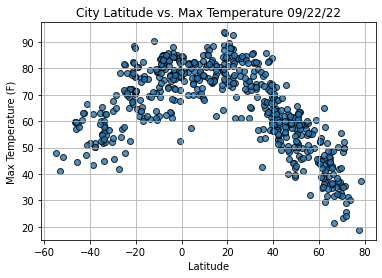

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

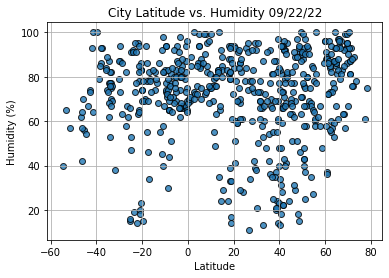

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

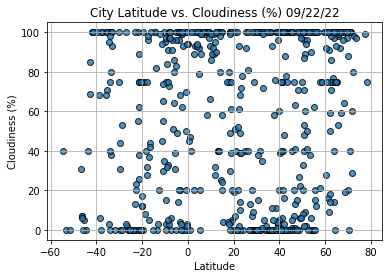

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

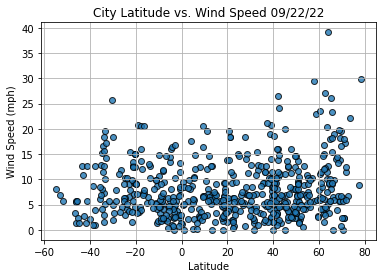

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [39]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show() 

In [40]:
index13 = city_data_df.loc[13]

In [41]:
index13

City                  Santa Maria
Lat                      -29.6842
Lng                      -53.8069
Max Temp                     45.7
Humidity                       87
Cloudiness                      0
Wind Speed                   3.44
Country                        BR
Date          2022-09-23 01:33:16
Name: 13, dtype: object

In [42]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Georgetown,5.4112,100.3354,82.33,85,20,5.99,MY,2022-09-23 01:34:17
1,Qaanaaq,77.4840,-69.3632,18.79,61,99,8.86,GL,2022-09-23 01:34:27
3,Banov,48.9880,17.7175,44.20,91,22,3.36,CZ,2022-09-23 01:34:27
7,Brae,60.3964,-1.3530,52.18,88,28,10.98,GB,2022-09-23 01:34:28
8,Ribeira Grande,38.5167,-28.7000,74.46,87,11,18.95,PT,2022-09-23 01:34:28


In [43]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

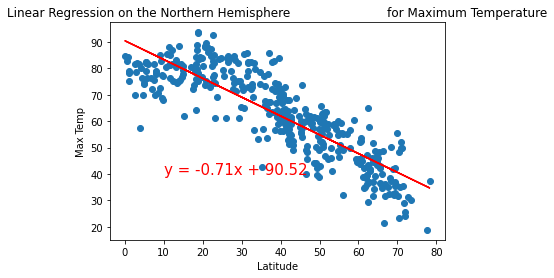

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

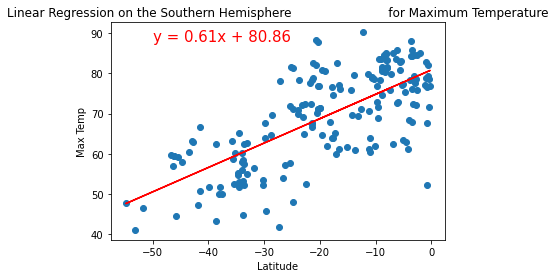

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,88))

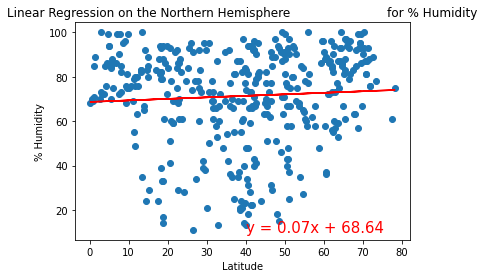

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

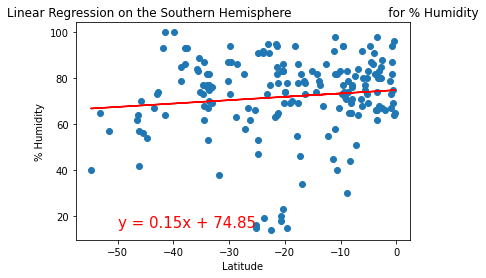

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

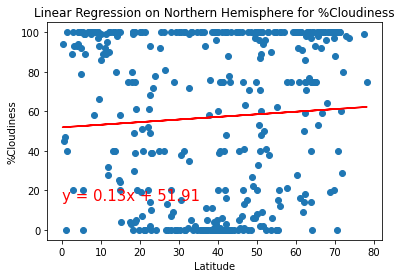

In [63]:
# Linear regression on the northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on Northern Hemisphere for %Cloudiness', '%Cloudiness',(0,15))

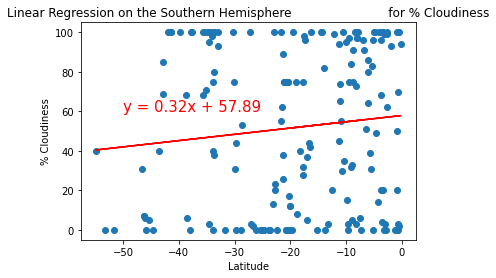

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

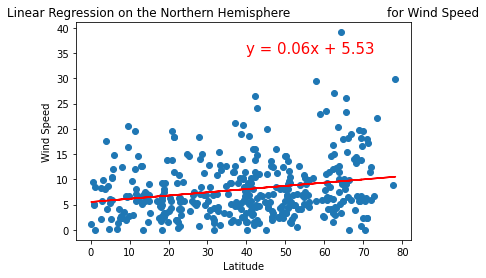

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

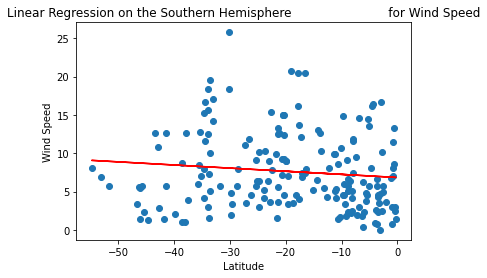

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))